#ANALIZA

kle das opis

poves iz kje pobiras dol pa kaj pa eni so vekrat napisani k so pr vec ekipah

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")

nba = pd.read_csv('NBA.csv', encoding="utf-8", index_col="Rk")
nba = nba.drop_duplicates(keep=False)       #da se zbisejo une vrstice
nba

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,.501,...,.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,.459,...,.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,.525,...,.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,.521,...,.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,.411,...,.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,.524,...,.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,.430,...,.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,.538,...,.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6


zbrisemo te stolpce kr bomo pol mogoc to sami zracunal pa se une vrstice k majo tisti k so pr vec ekipah

In [29]:
nba = nba.drop(columns=["FG%", "3P%", "2P%", "eFG%", "FT%"])
nba = nba[nba["Tm"].str.contains("TOT") == False]

mormo popraut podatke kr ce ne nc ne dela

In [30]:
NUMERIC_COLS = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 
       '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

nba_num = nba[NUMERIC_COLS]

nba_num = nba_num.apply(pd.to_numeric, errors='coerce').fillna(nba_num) # pretvorimo numerične iz str v stevilke



# dodamo numerične nazaj
nba[NUMERIC_COLS] = nba_num 

nba.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
3P        float64
3PA       float64
2P        float64
2PA       float64
FT        float64
FTA       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

zdej je kul tkoda loh normalno delamo naprej
najprej pogledamo kaj nm da top 10

In [31]:
nba.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,0.5,...,1.7,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,0.3,...,1.4,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,0.2,...,5.5,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
3,Ochai Agbaji,SG,23,UTA,51,10,19.7,2.1,4.9,0.9,...,0.4,0.7,1.8,2.5,0.9,0.5,0.6,0.7,1.3,5.4
3,Ochai Agbaji,SG,23,TOR,27,18,23.6,2.7,6.8,0.6,...,1.3,1.4,1.9,3.3,1.3,0.7,0.6,1.1,1.9,6.7
4,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,1.7,...,1.4,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7
5,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,1.6,...,0.8,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0
6,Grayson Allen,SG,28,PHO,75,74,33.5,4.5,9.1,2.7,...,2.0,0.6,3.3,3.9,3.0,0.9,0.6,1.3,2.1,13.5
7,Jarrett Allen,C,25,CLE,77,77,31.7,6.7,10.6,0.0,...,4.1,3.2,7.4,10.5,2.7,0.7,1.1,1.6,1.9,16.5


vidmo da so urejeni po abecedi kar nm nc ne pomaga tkoda jih razvrstimo po tockah

In [32]:
urejeni_tocke = nba.sort_values(['PTS'], ascending=False).head(15)
urejeni_tocke[["Player", "PTS", "Tm"]]

,Player,PTS,Tm
Rk,,,
143,Joel Embiid,34.7,PHI
128,Luka Dončić,33.9,DAL
11,Giannis Antetokounmpo,30.4,MIL
172,Shai Gilgeous-Alexander,30.1,OKC
76,Jalen Brunson,28.7,NYK
137,Kevin Durant,27.1,PHO
54,Devin Booker,27.1,PHO
489,Jayson Tatum,26.9,BOS
155,De'Aaron Fox,26.6,SAC


poglejmo keri majo trojke >= 3  na tekmo pa jih uredmo od najmlajsiga gor

In [38]:
urejene_trojke = nba[nba["3P"] >= 3].sort_values("Age", ascending=True)
urejene_trojke[['Player','3P','Age']]

,Player,3P,Age
Rk,,,
23,LaMelo Ball,3.2,22
362,Trey Murphy III,3.0,23
324,Tyrese Maxey,3.0,23
465,Anfernee Simons,3.4,24
216,Tyler Herro,3.1,24
128,Luka Dončić,4.1,24
489,Jayson Tatum,3.1,25
569,Trae Young,3.2,25
26,Desmond Bane,3.3,25


pogledamo keri igralci so u tej sezoni igral za dallas in jih razvrstimo po minutah na igriscu na tekmo to morm ugotovit se kako

In [34]:
mavs = nba[nba['Tm'].str.contains('DAL')]
mavs[["Player"]]

,Player
Rk,
70,Greg Brown III
113,Seth Curry
119,Dexter Dennis
128,Luka Dončić
146,Dante Exum
157,Alex Fudge
161,Daniel Gafford
189,Josh Green
198,Tim Hardaway Jr.


pogledamo kako so razporejeni po starostih

Text(0.5, 1.0, 'Igralci po starosti')

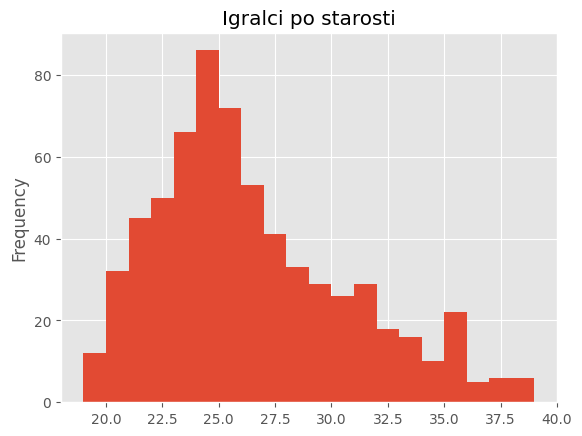

In [35]:
nba["Age"].plot.hist(bins=20)
#plt.xticks(np.arange(0,10))
plt.title("Igralci po starosti")

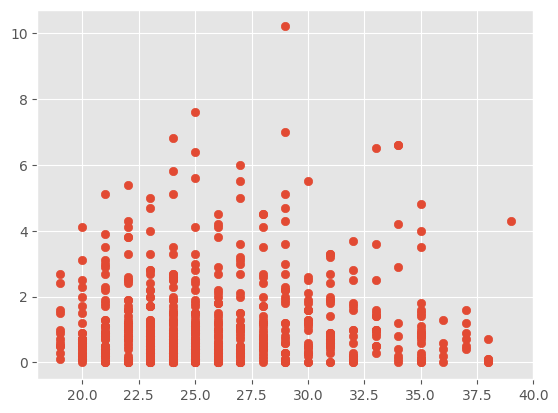

In [36]:
plt.scatter(nba["Age"], nba["FT"])
#kle najd ene druge stvari za primerjat te nc ne povejp

In [37]:
stevilo_tock_po_ekipah = nba.groupby('Tm').size()
stevilo_tock_po_ekipah.to_frame(name='Pts').sort_values(by='Pts', ascending=False)
#nism se fiks kaj mi tej podatki povejo

,Pts
Tm,
MEM,33
DET,31
TOR,30
PHI,28
CHO,26
NYK,26
WAS,24
POR,22
DAL,22
